In [69]:
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib notebook
import time

In [2]:
os.chdir('/home/rfinn/research/Virgo/getobjectsize-test/')

In [3]:
!ls

pointing-13_R.coadd.fits


# selecting galaxies

there are two fairly big galaxies in this image.  getting their x and y coordinates using ds9.

In [5]:
xobj = np.array([2461,3519])
yobj = np.array([2013,2913])
pimage = 'pointing-13_R.coadd.fits'

# Test code

In [14]:
%run ~/github/halphagui/get_galaxy_size.py

In [15]:
osize,segm = getsegmentation(pimage)

<IPython.core.display.Javascript object>


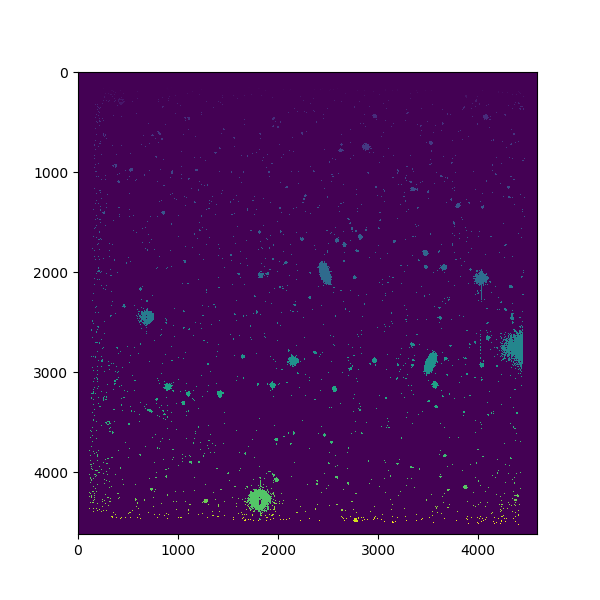

In [27]:
plt.figure(figsize=(6,6))
plt.imshow(osize.data)

In [31]:
%run ~/github/halphagui/get_galaxy_size.py

In [32]:
segm,cat = getsegmentation(pimage)

In [33]:
ids = segm.data[yobj,xobj]

In [41]:
objids = ids

In [38]:
tbl = cat.to_table()

In [51]:
dy = tbl['bbox_ymax'][objids-1] - tbl['bbox_ymin'][objids-1]
dx = tbl['bbox_xmax'][objids-1] - tbl['bbox_xmin'][objids-1]    
print(dx,dy)

[157. 148.] pix [257. 239.] pix


In [49]:
tbl[tbl['id'] == objids[0]]

id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,min_value,max_value,minval_xpos,minval_ypos,maxval_xpos,maxval_ypos,area,equivalent_radius,perimeter,semimajor_axis_sigma,semiminor_axis_sigma,orientation,eccentricity,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy,gini
,pix,pix,,,,,,,,pix,pix,pix,pix,,,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,,,,pix2,pix2,pix2,1 / pix2,1 / pix2,1 / pix2,
int64,float64,float64,object,object,float32,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4691,2462.1500291570105,2008.294863263546,None,None,9730.258,None,None,None,None,2381.0,2538.0,1883.0,2140.0,0.12041359,4.5614214,2408.0,1986.0,2461.0,2003.0,21026.0,81.80943507261483,3541.10905269635,49.27612693990338,21.605495859866227,70.35449861196916,0.8987518404077589,0.5615423288803512,2.280721870930875,688.4879577755092,621.0182023138657,2206.446179772659,0.0019466672907485262,-0.0010958035890351189,0.0006074279081731008,0.40333299978962917


In [50]:
tbl[4691]

id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,min_value,max_value,minval_xpos,minval_ypos,maxval_xpos,maxval_ypos,area,equivalent_radius,perimeter,semimajor_axis_sigma,semiminor_axis_sigma,orientation,eccentricity,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy,gini
,pix,pix,,,,,,,,pix,pix,pix,pix,,,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,,,,pix2,pix2,pix2,1 / pix2,1 / pix2,1 / pix2,
int64,float64,float64,object,object,float32,object,object,object,object,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4692,2455.717938458509,1883.9246531102358,None,None,0.77783436,None,None,None,None,2454.0,2457.0,1883.0,1885.0,0.12653458,0.19640224,2454.0,1884.0,2456.0,1883.0,5.0,1.2615662610100802,4.82842712474619,1.0165311821387413,0.5994784107429357,-18.034914793244873,0.8076008508375597,0.4102705147896625,1.6956927287488979,0.9687364646654562,-0.19840436416083337,0.4239735445418066,1.1416954046546233,1.0685447417274396,2.608657979415171,0.11146802330593465


In [54]:
np.max(dx,dy,keepdims=True)

TypeError: only integer dimensionless scalar quantities can be converted to a Python index

In [61]:
max(dx[0].value,dy[0].value)

257.0

# Trying all steps at once

* this works, but it's slow
* photutils takes a long time
* could create segmentation map with source extractor instead

In [62]:
%run ~/github/halphagui/get_galaxy_size.py

In [71]:
start_time = time.perf_counter()
size = getobjectsize(pimage,xobj,yobj)
print('elapsed time = ',time.perf_counter()-start_time)

elapsed time =  55.059521357063204


In [74]:
size

array([385.5, 358.5])

In [81]:
!ls

'default.*'   default.param   default.sex.HDI   pointing-13_R.coadd.fits


# trying source extractor instead of photutils

In [83]:
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
sizese = getobjectsize(pimage,xobj,yobj,usese=True)
print('elapsed time = ',time.perf_counter()-start_time)

FileNotFoundError: [Errno 2] No such file or directory: 'segmentation.fits'

In [73]:
t

array([385, 358], dtype=int32)

In [202]:
os.chdir('/home/rfinn/research/Virgo/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
segm,tbl = getsegmentation_se(pimage)

sex pointing-13_R.coadd.fits -c default.se.objsize -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME segmentation.fits -CATALOG_NAME test_cat.fits -CATALOG_TYPE FITS_LDAC


<IPython.core.display.Javascript object>


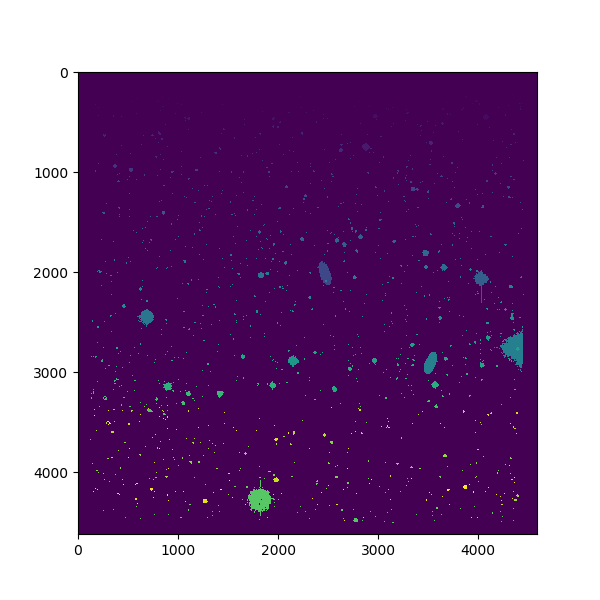

In [203]:
plt.figure(figsize=(6,6))
plt.imshow(segm)

In [204]:
objids = segm[yobj,xobj]

In [205]:
objids

array([484, 968], dtype=int32)

In [139]:
print(tbl['XMIN_IMAGE'][objids-1][0])
print(tbl['XMAX_IMAGE'][objids-1][0])
print(tbl['YMIN_IMAGE'][objids-1][0])
print(tbl['YMAX_IMAGE'][objids-1][0])

2291
2856
1750
2133


In [140]:
print(tbl['XMIN_IMAGE'][objids-1][1])
print(tbl['XMAX_IMAGE'][objids-1][1])
print(tbl['YMIN_IMAGE'][objids-1][1])
print(tbl['YMAX_IMAGE'][objids-1][1])

3270
3628
2560
3023


In [206]:
print(tbl['XMAX_IMAGE'][objids-1] - tbl['XMIN_IMAGE'][objids-1])
print(tbl['YMAX_IMAGE'][objids-1] - tbl['YMIN_IMAGE'][objids-1])

[252 296]
[376 337]


In [207]:
print(tbl['A_IMAGE'][objids-1])
print(tbl['B_IMAGE'][objids-1])
print(tbl['THETA_IMAGE'][objids-1])

[47.87003  37.725674]
[21.375994 17.545294]
[ 69.37998 -67.68456]


In [210]:
print(8*tbl['A_IMAGE'][objids-1])


[382.96024 301.8054 ]


In [199]:
print(tbl['PETRO_RADIUS'][objids-1])


[5.9399996 5.2799997]


In [178]:
for o in objids:
    o -= 1
    print(tbl['XMIN_IMAGE'][o],tbl['X_IMAGE'][o],tbl['XMAX_IMAGE'][o])
    print(tbl['YMIN_IMAGE'][o],tbl['Y_IMAGE'][o],tbl['YMAX_IMAGE'][o])
    print()

2338 2462.9978 2590
1757 2009.2377 2133

3443 3516.959 3795
2686 2906.682 3023



# Made adjustments 

In [180]:
os.chdir('/home/rfinn/research/Virgo/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
sizese = getobjectsize(pimage,xobj,yobj,usese=True)
print('elapsed time = ',time.perf_counter()-start_time)
print(sizese)

sex pointing-13_R.coadd.fits -c default.se.objsize -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME segmentation.fits -CATALOG_NAME test_cat.fits -CATALOG_TYPE FITS_LDAC
[0 0] [376 337]
elapsed time =  2.45926285488531
[564.  505.5]


In [173]:
objids[0]

450

# Issue with SE segmentation mask

getting a few far-flung points that are associated with my object.  no idea why.  for this case, it doesn't affect the size of the image too much, but I would like to understand why.

* made adjustments in the default.se file, with min detect area, deblend, etc
* works ok now, but who knows if it will fail on others

452


<IPython.core.display.Javascript object>


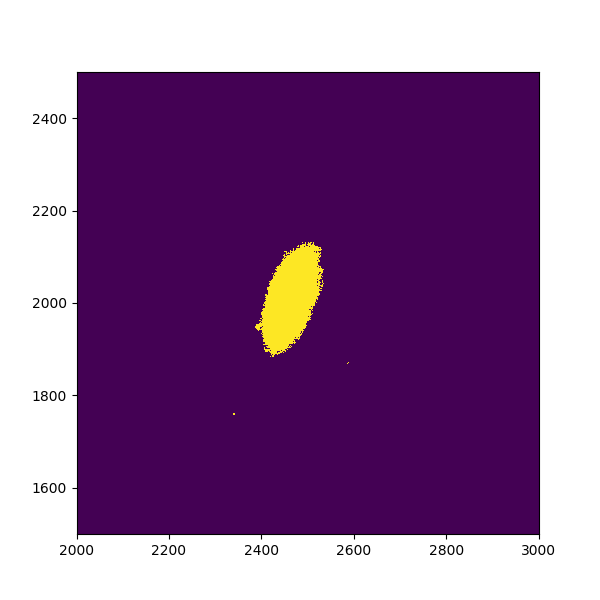

[2000, 3000, 1500, 2500]

In [181]:
print(objids[0])
t = segm == objids[0]
plt.figure(figsize=(6,6))
plt.imshow(t)
plt.axis([2000,3000,1500,2500])

# Comparing SE and photutils

In [213]:
os.chdir('/home/rfinn/research/Virgo/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
sizese = getobjectsize(pimage,xobj,yobj,usese=True)
print('elapsed time = ',time.perf_counter()-start_time)
print(sizese)

sex pointing-13_R.coadd.fits -c default.se.objsize -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME segmentation.fits -CATALOG_NAME test_cat.fits -CATALOG_TYPE FITS_LDAC
[484 968]
[2338 3443] [2590 3739]
[252 296]
[1757 2686] [2133 3023]
[376 337]
elapsed time =  2.5808277388568968
[564.  505.5]


In [218]:
os.chdir('/home/rfinn/research/Virgo/getobjectsize-test/')
%run ~/github/halphagui/get_galaxy_size.py
start_time = time.perf_counter()
size = getobjectsize(pimage,xobj,yobj,usese=False,scale=1.75)
print('elapsed time = ',time.perf_counter()-start_time)
print(size)

[ 731 1123]
[2381. 3441.] pix [2538. 3589.] pix
[157. 148.] pix
[1883. 2790.] pix [2140. 3029.] pix
[257. 239.] pix
elapsed time =  15.578698560129851
[449.75 418.25]


In [221]:
540./60

9.0